<a href="https://colab.research.google.com/github/qarimbas/pytorch-deep-learning-course/blob/main/01_pytorch_workflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
what_were_covering = {1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading a model",
    6: "putting it all together"
}

In [ ]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'1.13.0+cu116'

In [ ]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing 
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

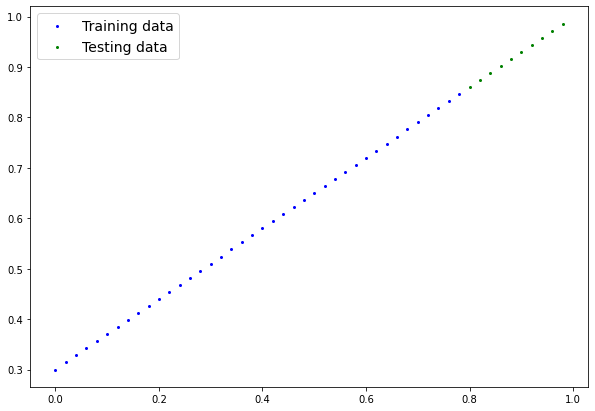

In [ ]:
plot_predictions();

In [ ]:
#Building Model
## Create linear regression model class

from torch import nn

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.rand(1, requires_grad=True, dtype=torch.float))

    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

  #Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias




In [ ]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True), Parameter containing:
 tensor([-0.6382], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([-0.6382]))])

In [ ]:
y_preds = model_0(X_test)
y_preds

tensor([[0.0677],
        [0.0853],
        [0.1030],
        [0.1206],
        [0.1382],
        [0.1559],
        [0.1735],
        [0.1912],
        [0.2088],
        [0.2265]], grad_fn=<AddBackward0>)

In [ ]:
with torch.inference_mode():
  y_preds = model_0(X_test)

#with torch.no_grad():
#  y_preds = model_0(X_test)

y_preds

tensor([[0.0677],
        [0.0853],
        [0.1030],
        [0.1206],
        [0.1382],
        [0.1559],
        [0.1735],
        [0.1912],
        [0.2088],
        [0.2265]])

In [ ]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

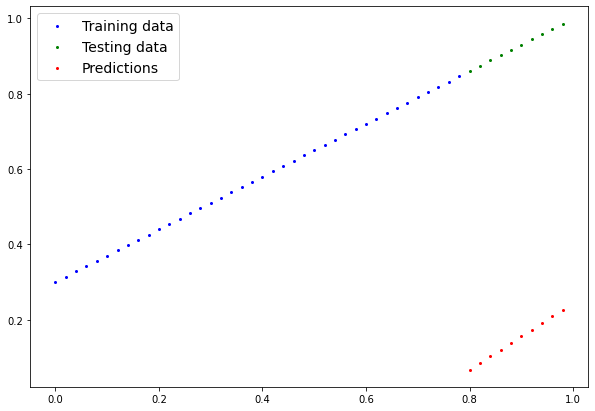

In [ ]:
plot_predictions(predictions=y_preds)

In [ ]:
## 3. Train model

list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True), Parameter containing:
 tensor([-0.6382], requires_grad=True)]

In [ ]:
#check out model's parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([-0.6382]))])

In [ ]:
#setup a loss function
loss_fn = nn.L1Loss()

#setup an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True), Parameter containing:
 tensor([-0.6382], requires_grad=True)]

In [ ]:
torch.manual_seed(42)

epochs = 200

epoch_count = []
loss_values = []
test_loss_values = []

#Training
for epoch in range(epochs):
  model_0.train() #training mode

  #1forward pass
  y_pred = model_0(X_train)

  #2calc loss
  loss = loss_fn(y_pred, y_train)#input1st target 2nd
  print(f"Loss: {loss}")

  #3optimizer zero grad
  optimizer.zero_grad()

  #4performback prop on the loss with respoct to parameters of the model
  loss.backward()

  #5Step the optimizer
  optimizer.step()

  #testing
  model_0.eval() #testing mode
  with torch.inference_mode(): #turns off gradient tracking
  #with torch.no_grad():
    #1forwardpass
    test_pred = model_0(X_test)

    #2Calc Loss
    test_loss = loss_fn(test_pred, y_test)
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss_values)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Test: {loss} | Test loss: {test_loss}")
  

  

  print(model_0.state_dict())

Loss: 0.8670692443847656
Epoch: 0 | Test: 0.8670692443847656 | Test loss: 0.7624635696411133
OrderedDict([('weights', tensor([0.8862])), ('bias', tensor([-0.6282]))])
Loss: 0.8555482625961304
OrderedDict([('weights', tensor([0.8901])), ('bias', tensor([-0.6182]))])
Loss: 0.8440272212028503
OrderedDict([('weights', tensor([0.8940])), ('bias', tensor([-0.6082]))])
Loss: 0.8325062990188599
OrderedDict([('weights', tensor([0.8979])), ('bias', tensor([-0.5982]))])
Loss: 0.8209851384162903
OrderedDict([('weights', tensor([0.9018])), ('bias', tensor([-0.5882]))])
Loss: 0.8094642758369446
OrderedDict([('weights', tensor([0.9057])), ('bias', tensor([-0.5782]))])
Loss: 0.7979432940483093
OrderedDict([('weights', tensor([0.9096])), ('bias', tensor([-0.5682]))])
Loss: 0.7864223122596741
OrderedDict([('weights', tensor([0.9135])), ('bias', tensor([-0.5582]))])
Loss: 0.7749012112617493
OrderedDict([('weights', tensor([0.9174])), ('bias', tensor([-0.5482]))])
Loss: 0.7633803486824036
OrderedDict([('w

In [ ]:
import numpy as np
#np.array(torch.tensor(loss_values).numpy()), test_loss_values

In [ ]:
#Plot the loss curves
#plt.plot(epoch_count, loss_values, label="Train loss")
#plt.plot(epoch_count, test_loss_values, label="Test loss")
#plt.title("training and test loss curves")
#plt.ylabel("Loss")
#plt.xlabel("Epochs")
#plt.legend();

In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.9462])), ('bias', tensor([0.1963]))])

In [ ]:
weight, bias

(0.7, 0.3)

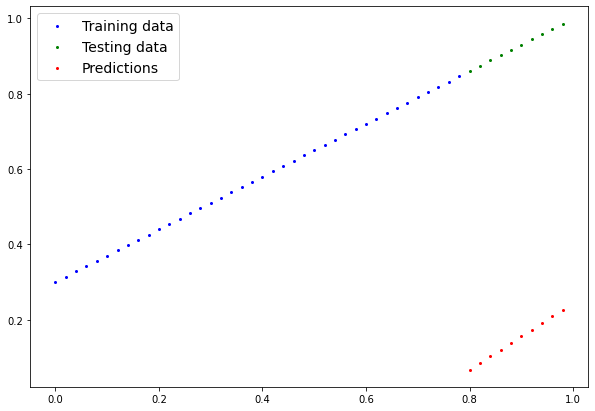

In [ ]:
plot_predictions(predictions=y_preds)

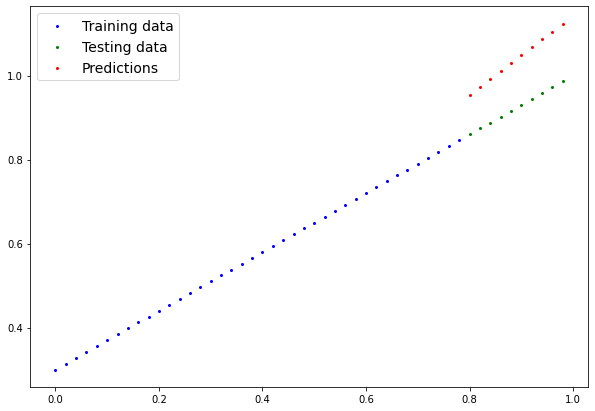

In [ ]:
plot_predictions(predictions=y_preds_new)

In [ ]:
#Saving model
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [ ]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1207 Dec 16 14:38 01_pytorch_workflow_model_0.pth


In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.9462])), ('bias', tensor([0.1963]))])

In [ ]:
loaded_model_0 = LinearRegressionModel()

loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.9462])), ('bias', tensor([0.1963]))])

In [ ]:
#Make predictions with loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.9533],
        [0.9723],
        [0.9912],
        [1.0101],
        [1.0290],
        [1.0480],
        [1.0669],
        [1.0858],
        [1.1047],
        [1.1237]])

In [ ]:
#compare loaded with orignial
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [ ]:
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.9533],
        [0.9723],
        [0.9912],
        [1.0101],
        [1.0290],
        [1.0480],
        [1.0669],
        [1.0858],
        [1.1047],
        [1.1237]])

In [ ]:
#Putting it all together
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'1.13.0+cu116'

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
weight = 0.2
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.3000],
         [0.3040],
         [0.3080],
         [0.3120],
         [0.3160],
         [0.3200],
         [0.3240],
         [0.3280],
         [0.3320],
         [0.3360]]))

In [ ]:
#split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

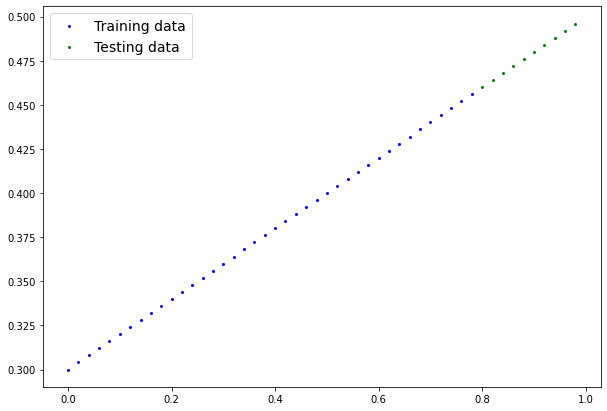

In [ ]:
#plott
plot_predictions(X_train, y_train, X_test, y_test)

In [ ]:
#create linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    #use nn.Linear() for creating model parameters
    self.linear_layer = nn.Linear(in_features=1, out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

#set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
X_train[:5], y_train[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]), tensor([[0.3000],
         [0.3040],
         [0.3080],
         [0.3120],
         [0.3160]]))

In [ ]:
#check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
#set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
 #training
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01)

In [ ]:
torch.manual_seed(42)

epoch = 200

X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  y_pred = model_1(X_train)

  loss = loss_fn(y_pred, y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  #testingg
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Loss: 0.013358138501644135 | Test loss: 0.03069612756371498
Epoch: 10 | Loss: 0.009927102364599705 | Test loss: 0.02242358960211277
Epoch: 20 | Loss: 0.006488305516541004 | Test loss: 0.014151099137961864
Epoch: 30 | Loss: 0.0030562281608581543 | Test loss: 0.006565505173057318
Epoch: 40 | Loss: 0.004468251019716263 | Test loss: 0.010956871323287487
Epoch: 50 | Loss: 0.004468251019716263 | Test loss: 0.010956871323287487
Epoch: 60 | Loss: 0.004468251019716263 | Test loss: 0.010956871323287487
Epoch: 70 | Loss: 0.004468251019716263 | Test loss: 0.010956871323287487
Epoch: 80 | Loss: 0.004468251019716263 | Test loss: 0.010956871323287487
Epoch: 90 | Loss: 0.004468251019716263 | Test loss: 0.010956871323287487
Epoch: 100 | Loss: 0.004468251019716263 | Test loss: 0.010956871323287487
Epoch: 110 | Loss: 0.004468251019716263 | Test loss: 0.010956871323287487
Epoch: 120 | Loss: 0.004468251019716263 | Test loss: 0.010956871323287487
Epoch: 130 | Loss: 0.004468251019716263 | Test los

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.2664]])),
             ('linear_layer.bias', tensor([0.2720]))])

In [ ]:
weight, bias

(0.2, 0.3)

In [ ]:
model_1.eval()

with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds

tensor([[0.4571],
        [0.4612],
        [0.4653],
        [0.4694],
        [0.4734],
        [0.4775],
        [0.4816],
        [0.4857],
        [0.4898],
        [0.4938]])

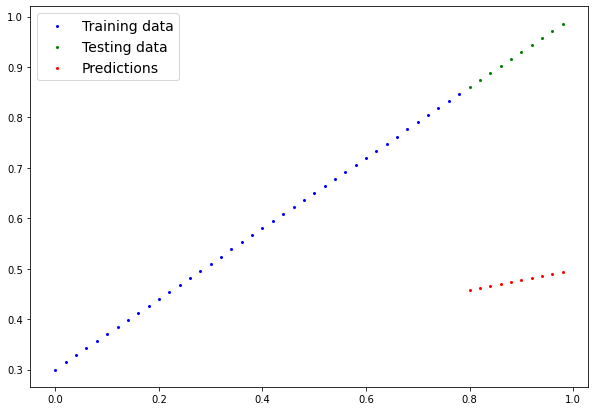

In [ ]:
#check out model predictions visually
plot_predictions(predictions=y_preds.cpu())

In [ ]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_1.pth


In [ ]:
#Load a Pytorch
loaded_model_1 = LinearRegressionModelV2()

loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
next(loaded_model_1.parameters()).device

device(type='cpu')

In [ ]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.2039]])),
             ('linear_layer.bias', tensor([0.2940]))])

In [ ]:
#evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])